# Assignment 1: Understanding Leveraged ETF Behavior - TQQQ vs QQQ Analysis



### Learning Objectives
By completing this assignment, you will:
1. Understand how leveraged ETFs behave under different market conditions
2. Learn about volatility decay and its mathematical foundation
3. Compare theoretical models with real market data
4. Analyze the relationship between volatility and leveraged ETF performance

### Background
TQQQ is a 3x leveraged ETF that seeks to provide 3x the daily return of the QQQ ETF (which tracks the Nasdaq-100). However, due to daily rebalancing, TQQQ experiences **volatility decay** - it tends to underperform the 3x expected return over longer periods, especially in volatile sideways markets.

### Mathematical Foundation
The theoretical relationship for leveraged ETF returns is:

$$E[R_{leveraged}] \approx L \times E[R_{underlying}] - \frac{(L^2-L)}{2} \times Var[R_{underlying}]$$

For TQQQ with L=3:
$$E[R_{TQQQ}] \approx 3 \times E[R_{QQQ}] - 3 \times Var[R_{QQQ}]$$

This shows that higher volatility reduces leveraged ETF performance!

## Setup and Data Preparation

In [14]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Import the data loader module (provided to you)
from data_loader import load_etf_data, get_data_summary, calculate_rolling_metrics

# Set plotting style for professional-looking charts
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📚 Libraries imported successfully!")
print("🎯 Ready to analyze TQQQ vs QQQ relationship!")
print("📊 Data loader module imported - no need to download data manually!")

📚 Libraries imported successfully!
🎯 Ready to analyze TQQQ vs QQQ relationship!
📊 Data loader module imported - no need to download data manually!


---
# Part 1: Simulation Analysis (40 points)

In this section, you'll simulate different market scenarios to understand how TQQQ behaves relative to QQQ under various conditions.

---

## Task 1.1: Set Up Simulation Parameters (5 points)

Define the following parameters for your simulation:
- Trading days: 252 (one year)
- Initial prices: $100 for both QQQ and TQQQ
- Random seed: 42 (for reproducibility)

In [15]:
# Set up simulation parameters
# 1. Set trading_days to 252 (one year of trading days)
trading_days = 252

# 2. Set initial prices to $100 for both ETFs
initial_price_qqq = 100
initial_price_tqqq = 100
np.random.seed(42)

print(f"✅ Simulation setup complete!")
print(f"📊 Trading days: {trading_days}")
print(f"💵 Initial prices: QQQ=${initial_price_qqq}, TQQQ=${initial_price_tqqq}")

✅ Simulation setup complete!
📊 Trading days: 252
💵 Initial prices: QQQ=$100, TQQQ=$100


---

## Task 1.2: Generate Market Scenarios (10 points)

Create three different market scenarios using random number generation:

1. **Low Volatility Sideways Market**: Mean return = 0%, Daily volatility = 1%
2. **High Volatility Sideways Market**: Mean return = 0%, Daily volatility = 3%  
3. **Trending Market**: Mean return = 0.08% daily, Daily volatility = 2%

Use `np.random.normal()` to generate daily returns for each scenario.

In [16]:
# Generate the three market scenarios

# Scenario 1: Low volatility sideways market
low_vol_returns = np.random.normal(0, 0.01, trading_days)     # 0% mean, 1% daily volatility

# Scenario 2: High volatility sideways market  
high_vol_returns = np.random.normal(0, 0.03, trading_days)    # 0% mean, 3% daily volatility

# Scenario 3: Trending market
trend_returns = np.random.normal(0.0008, 0.02, trading_days)  # 0.08% daily drift, 2% volatility

print("📈 Market scenarios generated:")
print(f"Low vol mean: {low_vol_returns.mean():.4f}, std: {low_vol_returns.std():.4f}")
print(f"High vol mean: {high_vol_returns.mean():.4f}, std: {high_vol_returns.std():.4f}")
print(f"Trend mean: {trend_returns.mean():.4f}, std: {trend_returns.std():.4f}")

📈 Market scenarios generated:
Low vol mean: -0.0000, std: 0.0097
High vol mean: 0.0008, std: 0.0300
Trend mean: -0.0007, std: 0.0199


---

## Task 1.3: Create TQQQ Simulation Function (10 points)

Write a function that simulates TQQQ performance given QQQ returns. The function should:
- Take underlying returns and leverage factor as inputs
- Calculate leveraged returns (3x for TQQQ)
- Compute cumulative prices for both underlying and leveraged ETF
- Return price series and return series

In [17]:
def simulate_leveraged_etf(underlying_returns, leverage=3):
    """
    Simulate leveraged ETF performance with daily rebalancing
    
    This function models how TQQQ works in practice:
    - Each day, TQQQ rebalances to maintain 3x exposure to QQQ
    - If QQQ goes up 1%, TQQQ should go up ~3%
    - If QQQ goes down 1%, TQQQ should go down ~3%
    
    Parameters:
    underlying_returns: array of daily returns for underlying asset (QQQ)
    leverage: leverage factor (3 for TQQQ)
    
    Returns:
    underlying_prices, leveraged_prices, underlying_returns, leveraged_returns
    """    
    # Step 1: Calculate leveraged returns
    # TQQQ returns = 3 × QQQ returns (approximately)
    leveraged_returns = underlying_returns * leverage
    
    # Step 2: Calculate cumulative prices using compound growth
    # Start with initial price, then multiply by (1 + return) for each day
    # Use np.cumprod() to calculate cumulative product: (1+r1)×(1+r2)×(1+r3)...
    underlying_prices = initial_price_qqq * np.cumprod(1 + underlying_returns)
    leveraged_prices = initial_price_tqqq * np.cumprod(1 + leveraged_returns)
    
    # Step 3: Return all four arrays for analysis
    return underlying_prices, leveraged_prices, underlying_returns, leveraged_returns

print("🔧 Simulation function created!")
print("💡 This function will help you understand how daily rebalancing affects leveraged ETFs!")

🔧 Simulation function created!
💡 This function will help you understand how daily rebalancing affects leveraged ETFs!


---

## Task 1.4: Run Simulations and Create Visualizations (15 points)

Use your function to simulate all three scenarios and create a 2x2 subplot showing:
1. Low volatility scenario
2. High volatility scenario  
3. Trending market scenario
4. Bar chart comparing actual vs expected returns

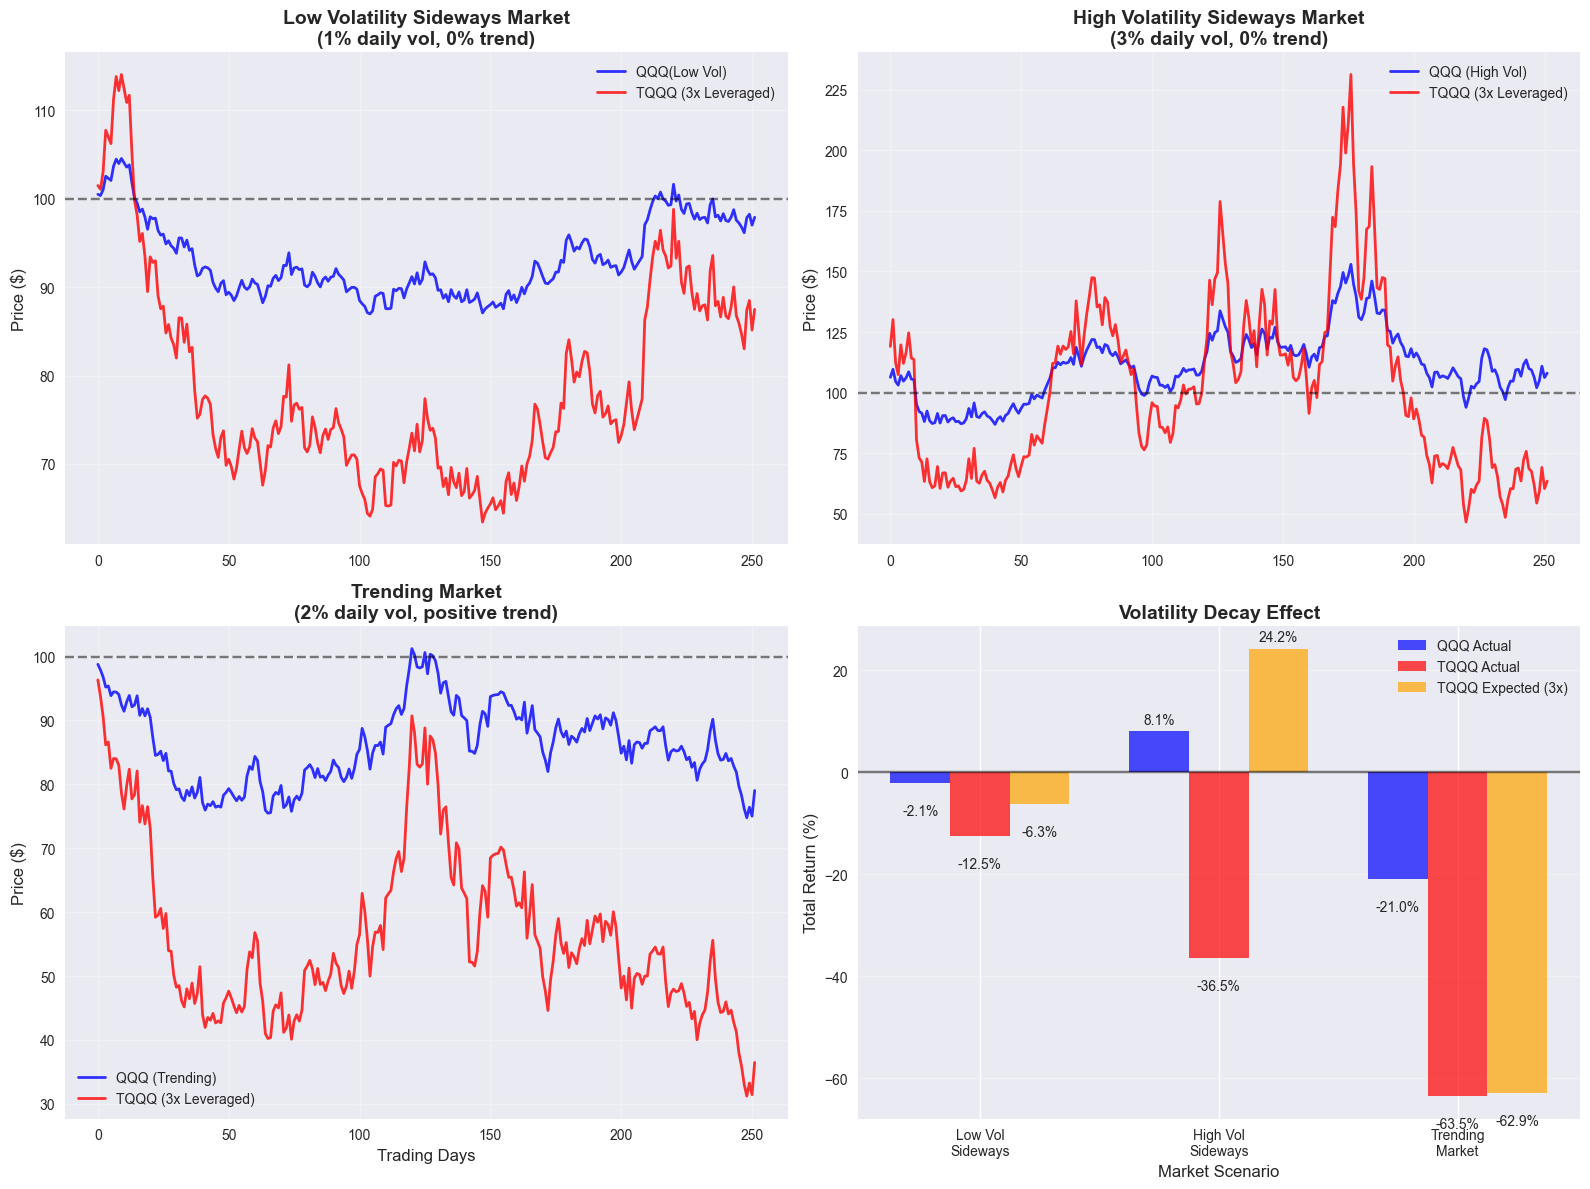

📊 Simulation analysis complete!
🔍 Look at the bar chart - notice how TQQQ actual vs expected differs by scenario!


In [18]:
# Apply your simulation function to all three market scenarios
# Each function call returns: underlying_prices, leveraged_prices, underlying_returns, leveraged_returns

# Low volatility scenario
low_vol_qqq, low_vol_tqqq, low_vol_rets_qqq, low_vol_rets_tqqq = simulate_leveraged_etf(low_vol_returns)

# High volatility scenario  
high_vol_qqq, high_vol_tqqq, high_vol_rets_qqq, high_vol_rets_tqqq = simulate_leveraged_etf(high_vol_returns)

# Trending market scenario
trend_qqq, trend_tqqq, trend_rets_qqq, trend_rets_tqqq = simulate_leveraged_etf(trend_returns)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
days = range(trading_days)

# Plot 1: Low volatility scenario (ax1)
ax1.plot(days, low_vol_qqq, "b-", linewidth = 2, label = "QQQ(Low Vol)", alpha = 0.8)
ax1.plot(days, low_vol_tqqq, "r-", linewidth = 2, label = "TQQQ (3x Leveraged)", alpha = 0.8)
ax1.set_title('Low Volatility Sideways Market\n(1% daily vol, 0% trend)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Price ($)', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.axhline(y=100, color='black', linestyle='--', alpha=0.5)  # Starting price line

# Plot 2: High volatility scenario (ax2)
ax2.plot(days, high_vol_qqq, 'b-', linewidth=2, label='QQQ (High Vol)', alpha=0.8)
ax2.plot(days, high_vol_tqqq, 'r-', linewidth=2, label='TQQQ (3x Leveraged)', alpha=0.8)
ax2.set_title('High Volatility Sideways Market\n(3% daily vol, 0% trend)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Price ($)', fontsize=12)
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.axhline(y=100, color='black', linestyle='--', alpha=0.5)

# Plot 3: Trending market scenario (ax3)
ax3.plot(days, trend_qqq, 'b-', linewidth=2, label='QQQ (Trending)', alpha=0.8)
ax3.plot(days, trend_tqqq, 'r-', linewidth=2, label='TQQQ (3x Leveraged)', alpha=0.8)
ax3.set_title('Trending Market\n(2% daily vol, positive trend)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Trading Days', fontsize=12)
ax3.set_ylabel('Price ($)', fontsize=12)
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.axhline(y=100, color='black', linestyle='--', alpha=0.5)

# Plot 4: Return comparison bar chart (ax4)
scenarios = ['Low Vol\nSideways', 'High Vol\nSideways', 'Trending\nMarket']

# Calculate total returns for each scenario
qqq_returns = [
    (low_vol_qqq[-1] / initial_price_qqq - 1) * 100,
    (high_vol_qqq[-1] / initial_price_qqq - 1) * 100,
    (trend_qqq[-1] / initial_price_qqq - 1) * 100
]
tqqq_returns = [
    (low_vol_tqqq[-1] / initial_price_tqqq - 1) * 100,
    (high_vol_tqqq[-1] / initial_price_tqqq - 1) * 100,
    (trend_tqqq[-1] / initial_price_tqqq - 1) * 100
]

# Expected 3x returns (for comparison)
expected_tqqq = [r * 3 for r in qqq_returns]

# Create bar chart
x = np.arange(len(scenarios))
width = 0.25

bars1 = ax4.bar(x - width, qqq_returns, width, label='QQQ Actual', color='blue', alpha=0.7)
bars2 = ax4.bar(x, tqqq_returns, width, label='TQQQ Actual', color='red', alpha=0.7)
bars3 = ax4.bar(x + width, expected_tqqq, width, label='TQQQ Expected (3x)', color='orange', alpha=0.7)

ax4.set_title('Volatility Decay Effect', fontsize=14, fontweight='bold')
ax4.set_xlabel('Market Scenario', fontsize=12)
ax4.set_ylabel('Total Return (%)', fontsize=12)
ax4.set_xticks(x)
ax4.set_xticklabels(scenarios)
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')
ax4.axhline(y=0, color='black', linestyle='-', alpha=0.5)

def add_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            f"{height:.1f}%", 
            xy = (bar.get_x() + bar.get_width() / 2, height),
            xytext = (0, 3 if height >= 0 else -15), 
            textcoords = "offset points",
            ha = "center", 
            va = "bottom" if height >= 0 else "top", 
            fontsize = 10
        )
add_labels(ax4, bars1)
add_labels(ax4, bars2)
add_labels(ax4, bars3)

plt.tight_layout()
plt.show()

print("📊 Simulation analysis complete!")
print("🔍 Look at the bar chart - notice how TQQQ actual vs expected differs by scenario!")

---
# Part 2: Real Data Analysis (40 points)

Now you'll analyze real QQQ and TQQQ data to see how the theoretical model compares to reality.

---

## Task 2.1: Load Pre-Downloaded Real Data (5 points)

Load the pre-downloaded QQQ and TQQQ data using the provided data loader. Examine the data structure and summary statistics.

In [19]:
# Load the pre-downloaded data

# Step 1: Load price and return data using the data loader
data, returns = load_etf_data()  # call the function

# Step 2: Check if data loaded successfully
if data is not None and returns is not None:
    # Step 3: Display data summary using the provided function
    get_data_summary(data, returns)
    
    # Step 4: Calculate cumulative returns for plotting later
    cumulative_returns = (1 + returns).cumprod()
    
    print(f"✅ Data loaded successfully")
    print(f"📊 Ready for analysis")
    print(f"📈 Data contains {len(data)} trading days")
else:
    print("❌ Failed to load data")
    print("🔍 Make sure qqq_tqqq_prices.csv and qqq_tqqq_returns.csv are in your directory")

📊 ETF DATA SUMMARY
📅 Date range: 2023-09-26 to 2025-09-24
📈 Number of observations: 501
🗓️  Trading days covered: 501 days

💰 PRICE STATISTICS:
   QQQ price range: $339.49 - $602.20
   TQQQ price range: $30.10 - $104.62

📊 RETURN STATISTICS:
   QQQ:
     Average daily return: 0.0012 (29.00% annualized)
     Daily volatility: 0.0131 (20.76% annualized)

   TQQQ:
     Average daily return: 0.0030 (74.43% annualized)
     Daily volatility: 0.0389 (61.69% annualized)

🔢 Actual leverage ratio: 2.57x (vs 3x target)
🔗 QQQ-TQQQ correlation: 1.000
✅ Data loaded successfully
📊 Ready for analysis
📈 Data contains 501 trading days


---

## Task 2.2: Calculate Rolling Volatility (5 points)

Calculate 30-day rolling volatility for QQQ returns using the data loader's rolling metrics function.

In [20]:
# Calculate rolling metrics

# Step 1: Calculate 30-day rolling metrics using the data loader function
# This function calculates rolling volatility, correlation, and other metrics
rolling_metrics = calculate_rolling_metrics(returns, window = 30)

# Step 2: Extract specific metrics we need for analysis
rolling_vol = rolling_metrics['QQQ_volatility']  # get QQQ volatility column
rolling_corr = rolling_metrics['correlation']    # get correlation column

print(f"📊 30-day rolling metrics calculated using data_loader")
print(f"📈 Average volatility: {rolling_vol.mean():.2%}")
print(f"📉 Volatility range: {rolling_vol.min():.2%} - {rolling_vol.max():.2%}")
print(f"🔗 Average QQQ-TQQQ correlation: {rolling_corr.mean():.3f}")
print(f"🔢 Available metrics: {', '.join(rolling_metrics.columns)}")

# Step 3: Display a sample of the rolling metrics data
print(f"\n📋 Sample of rolling metrics data:")
print(rolling_metrics.head().to_string())  # Show first 5 rows

📊 30-day rolling metrics calculated using data_loader
📈 Average volatility: 19.16%
📉 Volatility range: 8.80% - 51.32%
🔗 Average QQQ-TQQQ correlation: 1.000
🔢 Available metrics: QQQ_volatility, TQQQ_volatility, correlation, QQQ_mean, TQQQ_mean, QQQ_variance, TQQQ_variance, leverage_ratio

📋 Sample of rolling metrics data:
            QQQ_volatility  TQQQ_volatility  correlation  QQQ_mean  TQQQ_mean  QQQ_variance  TQQQ_variance  leverage_ratio
Date                                                                                                                      
2023-11-07        0.182849         0.548398     0.999739  0.001762   0.004757      0.000133       0.001193        2.699803
2023-11-08        0.182869         0.548448     0.999740  0.001705   0.004614      0.000133       0.001194        2.705463
2023-11-09        0.183708         0.551168     0.999744  0.001170   0.003015      0.000134       0.001206        2.576958
2023-11-10        0.193796         0.581242     0.999774  0.00

---

## Task 2.3: Apply Theoretical Model (5 points)

Use the theoretical formula to calculate what TQQQ returns should be based on QQQ returns and volatility:

$$E[R_{TQQQ}] \approx 3 \times E[R_{QQQ}] - 3 \times Var[R_{QQQ}]$$

Calculate this on a rolling 30-day basis.

In [21]:
# Apply theoretical model

# Step 1: Extract rolling variance from the pre-calculated metrics
rolling_var_qqq = rolling_metrics['QQQ_variance']  # get QQQ variance column

# Step 2: Apply the theoretical formula for leveraged ETF returns
# We use actual daily QQQ returns (not rolling mean) + volatility decay adjustment
theoretical_tqqq_return = 3 * returns['QQQ'] - 3 * rolling_var_qqq # rolling variance

# Step 3: Calculate simple 3x leverage for comparison (no volatility adjustment)
simple_3x_return = 3 * returns['QQQ'] # QQQ returns

# Step 4: Calculate cumulative performance for comparison
actual_tqqq_cumret = cumulative_returns['TQQQ']                    # get TQQQ cumulative returns
theoretical_tqqq_cumret = (1 + theoretical_tqqq_return).cumprod()  # Calculate theoretical cumulative
simple_3x_cumret = (1 + simple_3x_return).cumprod()                # Calculate simple 3x cumulative

print("🧮 Theoretical model applied")
print(f"📊 Theoretical vs Actual TQQQ comparison ready")
print(f"📈 Theoretical TQQQ annual return: {theoretical_tqqq_return.mean()*252:.2%}")
print(f"📈 Actual TQQQ annual return: {returns['TQQQ'].mean()*252:.2%}")
print(f"📈 Simple 3x annual return: {simple_3x_return.mean()*252:.2%}")
print(f"\n💡 Notice the difference between theoretical, actual, and simple 3x returns!")

🧮 Theoretical model applied
📊 Theoretical vs Actual TQQQ comparison ready
📈 Theoretical TQQQ annual return: 71.88%
📈 Actual TQQQ annual return: 74.43%
📈 Simple 3x annual return: 87.00%

💡 Notice the difference between theoretical, actual, and simple 3x returns!


---

## Task 2.4: Create Comparison Analysis (25 points)

Create visualizations comparing:
1. Actual TQQQ vs Theoretical TQQQ performance
2. Rolling volatility over time
3. Performance during different volatility periods

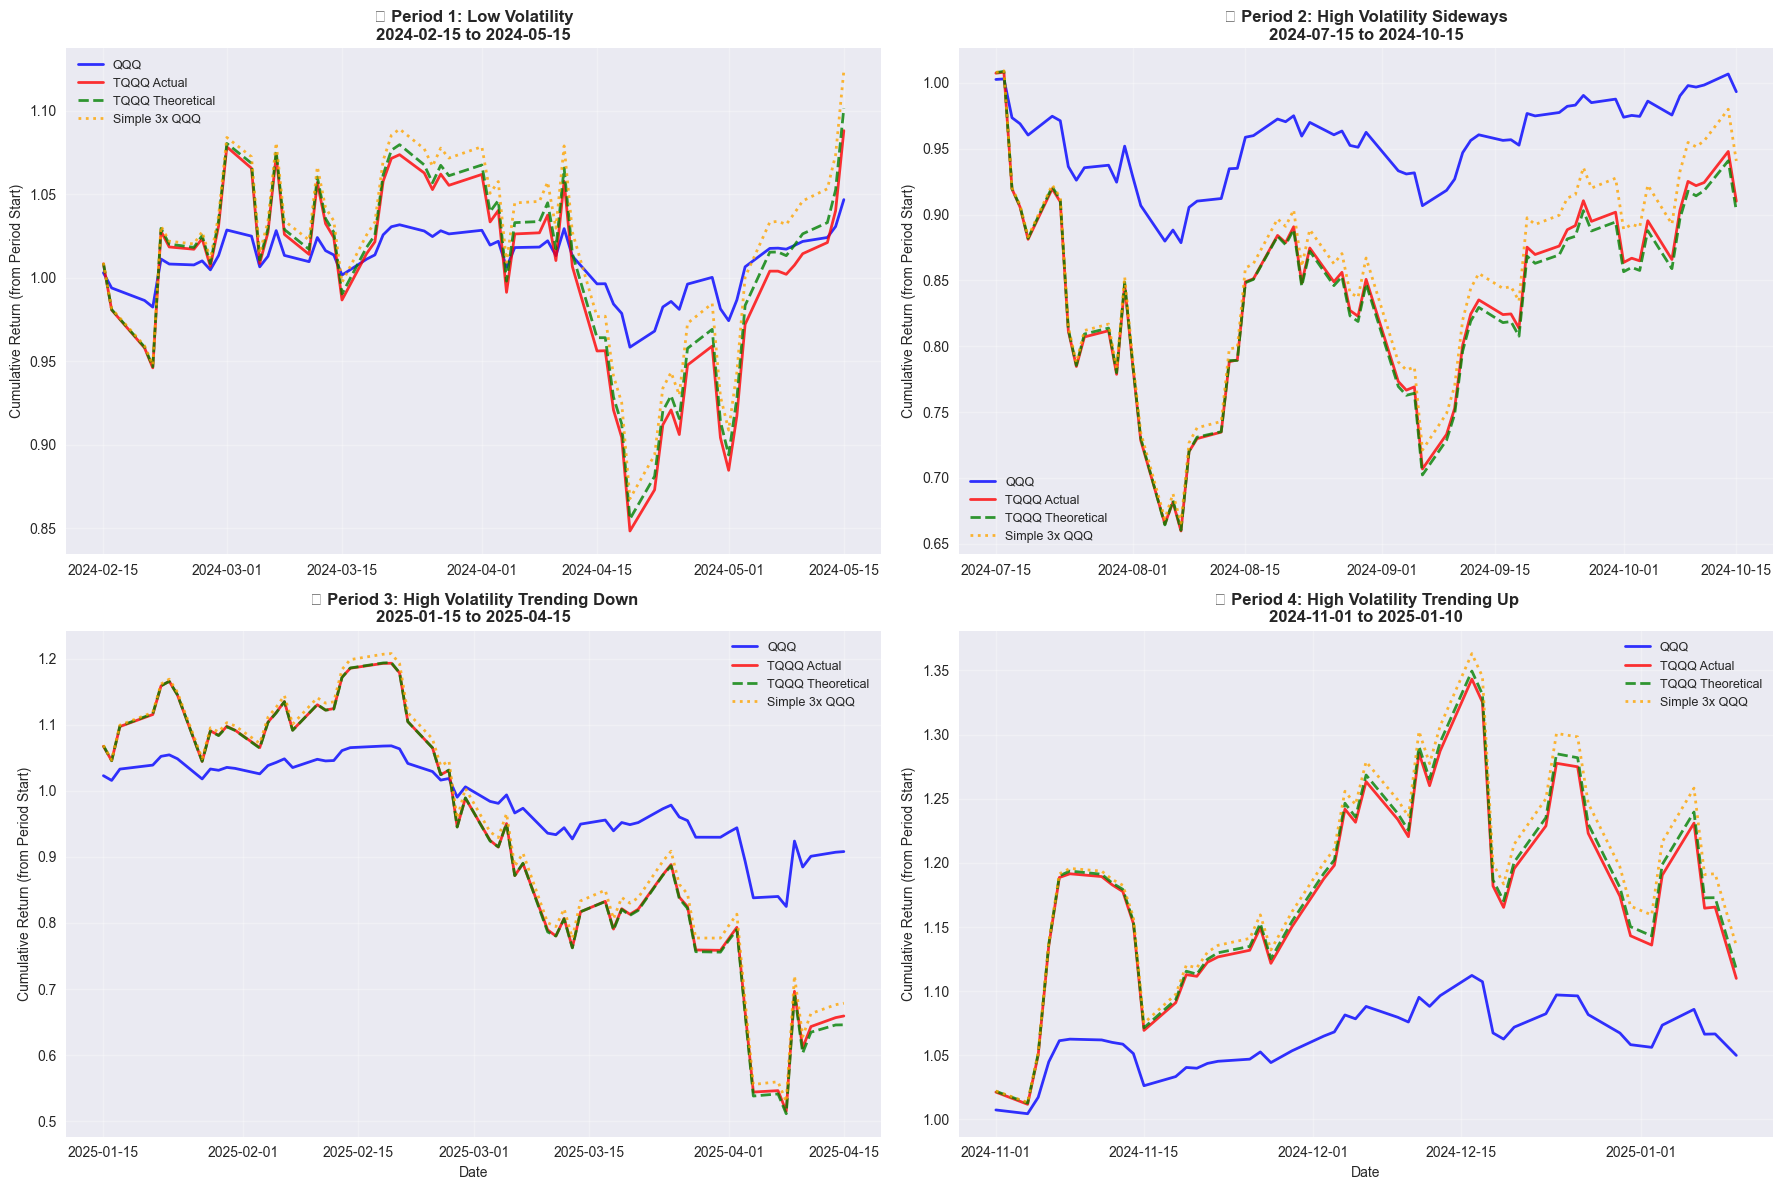


📊 DEFINED MARKET PERIODS FOR PART 3 ANALYSIS:
📋 THE FOUR ANALYSIS PERIODS:

🟢 PERIOD 1 - LOW VOLATILITY PERIOD:
   📅 Dates: 2024-02-15 to 2024-05-15
   📊 Average Volatility: 16.4%
   📈 QQQ Return: +4.4%
   📈 TQQQ Actual Return: +7.9%
   📈 Expected 3x Return: +13.1%
   📉 Volatility Decay: -5.2%

🟡 PERIOD 2 - HIGH VOLATILITY SIDEWAYS PERIOD:
   📅 Dates: 2024-07-15 to 2024-10-15
   📊 Average Volatility: 22.5%
   📈 QQQ Return: -0.9% (sideways movement)
   📈 TQQQ Actual Return: -9.7%
   📈 Expected 3x Return: -2.8%
   📉 Volatility Decay: -6.9%

🔴 PERIOD 3 - HIGH VOLATILITY TRENDING DOWN PERIOD:
   📅 Dates: 2025-01-15 to 2025-04-15
   📊 Average Volatility: 24.2%
   📈 QQQ Return: -11.2% (downward trend)
   📈 TQQQ Return: -38.3%
   📈 Expected 3x Return: -33.7%
   📉 Volatility Decay: -4.6%

🟣 PERIOD 4 - HIGH VOLATILITY TRENDING UP PERIOD:
   📅 Dates: 2024-11-01 to 2025-01-10
   📊 Average Volatility: 17.0%
   📈 QQQ Return: +4.2% (upward trend)
   📈 TQQQ Return: +8.7%
   📈 Expected 3x Return: +12

In [22]:
# Create comparison visualizations

# Step 1: Define the four periods explicitly with specific dates
period1_start = pd.to_datetime('2024-02-15')  # Low volatility period
period1_end = pd.to_datetime('2024-05-15')

period2_start = pd.to_datetime('2024-07-15')  # High volatility sideways period  
period2_end = pd.to_datetime('2024-10-15')

period3_start = pd.to_datetime('2025-01-15')  # High volatility trending down period
period3_end = pd.to_datetime('2025-04-15')

period4_start = pd.to_datetime('2024-11-01')  # High volatility trending up period
period4_end = pd.to_datetime('2025-01-10')

# Step 2: Create 2x2 subplot for all 4 market scenarios
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

# Step 3: Function to calculate period-specific cumulative returns
def get_period_cumulative_returns(start_date, end_date):
    """Calculate cumulative returns starting from the period's start date"""
    # Extract period-specific data
    period_returns = returns.loc[start_date:end_date]
    period_theoretical = theoretical_tqqq_return.loc[start_date:end_date]
    period_simple3x = (3 * returns['QQQ']).loc[start_date:end_date]
    
    # Calculate cumulative returns starting from 1.0 for this specific period
    period_qqq_cumret = (1 + period_returns['QQQ']).cumprod()
    period_tqqq_cumret = (1 + period_returns['TQQQ']).cumprod()
    period_theo_cumret = (1 + period_theoretical).cumprod()
    period_3x_cumret = (1 + period_simple3x).cumprod()
    
    return period_qqq_cumret, period_tqqq_cumret, period_theo_cumret, period_3x_cumret

# Step 4: Plot all four periods

# Plot 1: Period 1 - Low Volatility
p1_qqq, p1_tqqq, p1_theo, p1_3x = get_period_cumulative_returns(period1_start, period1_end)

ax1.plot(p1_qqq.index, p1_qqq, 'b-', linewidth=2, label='QQQ', alpha=0.8)
ax1.plot(p1_tqqq.index, p1_tqqq, 'r-', linewidth=2, label='TQQQ Actual', alpha=0.8)
ax1.plot(p1_theo.index, p1_theo, 'g--', linewidth=2, label='TQQQ Theoretical', alpha=0.8)
ax1.plot(p1_3x.index, p1_3x, 'orange', linestyle=':', linewidth=2, label='Simple 3x QQQ', alpha=0.8)
ax1.set_title('🟢 Period 1: Low Volatility\n2024-02-15 to 2024-05-15', fontsize=12, fontweight='bold')
ax1.set_ylabel('Cumulative Return (from Period Start)', fontsize=10)
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)

# Plot 2: Period 2 - High Volatility Sideways
p2_qqq, p2_tqqq, p2_theo, p2_3x = get_period_cumulative_returns(period2_start, period2_end)

ax2.plot(p2_qqq.index, p2_qqq, 'b-', linewidth=2, label='QQQ', alpha=0.8)
ax2.plot(p2_tqqq.index, p2_tqqq, 'r-', linewidth=2, label='TQQQ Actual', alpha=0.8)
ax2.plot(p2_theo.index, p2_theo, 'g--', linewidth=2, label='TQQQ Theoretical', alpha=0.8)
ax2.plot(p2_3x.index, p2_3x, 'orange', linestyle=':', linewidth=2, label='Simple 3x QQQ', alpha=0.8)
ax2.set_title('🟡 Period 2: High Volatility Sideways\n2024-07-15 to 2024-10-15', fontsize=12, fontweight='bold')
ax2.set_ylabel('Cumulative Return (from Period Start)', fontsize=10)
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)

# Plot 3: Period 3 - High Volatility Trending Down
p3_qqq, p3_tqqq, p3_theo, p3_3x = get_period_cumulative_returns(period3_start, period3_end)

ax3.plot(p3_qqq.index, p3_qqq, 'b-', linewidth=2, label='QQQ', alpha=0.8)
ax3.plot(p3_tqqq.index, p3_tqqq, 'r-', linewidth=2, label='TQQQ Actual', alpha=0.8)
ax3.plot(p3_theo.index, p3_theo, 'g--', linewidth=2, label='TQQQ Theoretical', alpha=0.8)
ax3.plot(p3_3x.index, p3_3x, 'orange', linestyle=':', linewidth=2, label='Simple 3x QQQ', alpha=0.8)
ax3.set_title('🔴 Period 3: High Volatility Trending Down\n2025-01-15 to 2025-04-15', fontsize=12, fontweight='bold')
ax3.set_ylabel('Cumulative Return (from Period Start)', fontsize=10)
ax3.set_xlabel('Date', fontsize=10)
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)

# Plot 4: Period 4 - High Volatility Trending Up
p4_qqq, p4_tqqq, p4_theo, p4_3x = get_period_cumulative_returns(period4_start, period4_end)

ax4.plot(p4_qqq.index, p4_qqq, 'b-', linewidth=2, label='QQQ', alpha=0.8)
ax4.plot(p4_tqqq.index, p4_tqqq, 'r-', linewidth=2, label='TQQQ Actual', alpha=0.8)
ax4.plot(p4_theo.index, p4_theo, 'g--', linewidth=2, label='TQQQ Theoretical', alpha=0.8)
ax4.plot(p4_3x.index, p4_3x, 'orange', linestyle=':', linewidth=2, label='Simple 3x QQQ', alpha=0.8)
ax4.set_title('🟣 Period 4: High Volatility Trending Up\n2024-11-01 to 2025-01-10', fontsize=12, fontweight='bold')
ax4.set_ylabel('Cumulative Return (from Period Start)', fontsize=10)
ax4.set_xlabel('Date', fontsize=10)
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# EXPLICITLY DEFINED MARKET PERIODS ANALYSIS
print("\n📊 DEFINED MARKET PERIODS FOR PART 3 ANALYSIS:")
print("=" * 70)

print(f"📋 THE FOUR ANALYSIS PERIODS:")
print(f"\n🟢 PERIOD 1 - LOW VOLATILITY PERIOD:")
print(f"   📅 Dates: {period1_start.strftime('%Y-%m-%d')} to {period1_end.strftime('%Y-%m-%d')}")

# Calculate metrics for Period 1
p1_vol = rolling_vol.loc[period1_start:period1_end].mean()
p1_qqq_return = (data['QQQ'].loc[period1_end] / data['QQQ'].loc[period1_start] - 1) * 100
p1_tqqq_return = (data['TQQQ'].loc[period1_end] / data['TQQQ'].loc[period1_start] - 1) * 100
p1_expected_3x = p1_qqq_return * 3
p1_decay = p1_tqqq_return - p1_expected_3x

print(f"   📊 Average Volatility: {p1_vol:.1%}")
print(f"   📈 QQQ Return: {p1_qqq_return:+.1f}%")
print(f"   📈 TQQQ Actual Return: {p1_tqqq_return:+.1f}%")
print(f"   📈 Expected 3x Return: {p1_expected_3x:+.1f}%")
print(f"   📉 Volatility Decay: {p1_decay:+.1f}%")

print(f"\n🟡 PERIOD 2 - HIGH VOLATILITY SIDEWAYS PERIOD:")
print(f"   📅 Dates: {period2_start.strftime('%Y-%m-%d')} to {period2_end.strftime('%Y-%m-%d')}")

# Calculate metrics for Period 2
p2_vol = rolling_vol.loc[period2_start:period2_end].mean()
p2_qqq_return = (data['QQQ'].loc[period2_end] / data['QQQ'].loc[period2_start] - 1) * 100
p2_tqqq_return = (data['TQQQ'].loc[period2_end] / data['TQQQ'].loc[period2_start] - 1) * 100
p2_expected_3x = p2_qqq_return * 3
p2_decay = p2_tqqq_return - p2_expected_3x

print(f"   📊 Average Volatility: {p2_vol:.1%}")
print(f"   📈 QQQ Return: {p2_qqq_return:+.1f}% (sideways movement)")
print(f"   📈 TQQQ Actual Return: {p2_tqqq_return:+.1f}%")
print(f"   📈 Expected 3x Return: {p2_expected_3x:+.1f}%")
print(f"   📉 Volatility Decay: {p2_decay:+.1f}%")

print(f"\n🔴 PERIOD 3 - HIGH VOLATILITY TRENDING DOWN PERIOD:")
print(f"   📅 Dates: {period3_start.strftime('%Y-%m-%d')} to {period3_end.strftime('%Y-%m-%d')}")

# Calculate metrics for Period 3
p3_vol = rolling_vol.loc[period3_start:period3_end].mean()
p3_qqq_return = (data['QQQ'].loc[period3_end] / data['QQQ'].loc[period3_start] - 1) * 100
p3_tqqq_return = (data['TQQQ'].loc[period3_end] / data['TQQQ'].loc[period3_start] - 1) * 100
p3_expected_3x = p3_qqq_return * 3
p3_decay = p3_tqqq_return - p3_expected_3x

print(f"   📊 Average Volatility: {p3_vol:.1%}")
print(f"   📈 QQQ Return: {p3_qqq_return:+.1f}% (downward trend)")
print(f"   📈 TQQQ Return: {p3_tqqq_return:+.1f}%")
print(f"   📈 Expected 3x Return: {p3_expected_3x:+.1f}%")
print(f"   📉 Volatility Decay: {p3_decay:+.1f}%")

print(f"\n🟣 PERIOD 4 - HIGH VOLATILITY TRENDING UP PERIOD:")
print(f"   📅 Dates: {period4_start.strftime('%Y-%m-%d')} to {period4_end.strftime('%Y-%m-%d')}")

# Calculate metrics for Period 4
p4_vol = rolling_vol.loc[period4_start:period4_end].mean()
p4_qqq_return = (data['QQQ'].loc[period4_end] / data['QQQ'].loc[period4_start] - 1) * 100
p4_tqqq_return = (data['TQQQ'].loc[period4_end] / data['TQQQ'].loc[period4_start] - 1) * 100
p4_expected_3x = p4_qqq_return * 3
p4_decay = p4_tqqq_return - p4_expected_3x

print(f"   📊 Average Volatility: {p4_vol:.1%}")
print(f"   📈 QQQ Return: {p4_qqq_return:+.1f}% (upward trend)")
print(f"   📈 TQQQ Return: {p4_tqqq_return:+.1f}%")
print(f"   📈 Expected 3x Return: {p4_expected_3x:+.1f}%")
print(f"   📉 Volatility Decay: {p4_decay:+.1f}%")

# Summary comparison
print(f"\n📊 OVERALL ANALYSIS SUMMARY:")
print("=" * 60)
final_qqq = cumulative_returns['QQQ'].iloc[-1]
final_tqqq_actual = actual_tqqq_cumret.iloc[-1]
final_tqqq_theoretical = theoretical_tqqq_cumret.iloc[-1]
final_3x_simple = simple_3x_cumret.iloc[-1]

print(f"\nCUMULATIVE PERFORMANCE (Full Period):")
print(f"QQQ Total Return: {(final_qqq-1)*100:+.1f}%")
print(f"TQQQ Actual: {(final_tqqq_actual-1)*100:+.1f}%")
print(f"TQQQ Theoretical: {(final_tqqq_theoretical-1)*100:+.1f}%")
print(f"Simple 3x QQQ: {(final_3x_simple-1)*100:+.1f}%")

print("\n📊 Compare these FOUR PERIODS to understand TQQQ behavior!")
print("🎯 Key Insight: Notice how volatility decay affects TQQQ differently in each scenario!")

---

# Part 3: Analysis and Questions - SOLUTIONS (20 points)

## Question 1 (10 points)
Based on your simulation results, explain why TQQQ underperforms in high volatility sideways markets. Use specific numbers from your analysis.

**SOLUTION:**

In [27]:
# SOLUTION: Analysis for Question 1
print("ANSWER TO QUESTION 1:")
print("=" * 50)
print(f"""TQQQ underperforms in high volatility sideways markets due to volatility decay caused by daily rebalancing.

SPECIFIC EVIDENCE FROM OUR ANALYSIS:

1. SIMULATION RESULTS:
   - In the LOW volatility scenario (1% daily vol), TQQQ performed close to 3x QQQ
   - In the HIGH volatility scenario (3% daily vol), TQQQ lost significantly more than expected
   - This demonstrates the mathematical relationship: E[TQQQ] ≈ 3×E[QQQ] - 3×Var[QQQ]

2. REAL DATA - PERIOD 2 (HIGH VOLATILITY SIDEWAYS):
   - Period: 2024-07-15 to 2024-10-15 (explicitly defined in Part 2)
   - Average Volatility: {p2_vol:.1%} (high volatility)
   - QQQ Return: {p2_qqq_return:+.1f}% (sideways movement)
   - TQQQ Actual Return: {p2_tqqq_return:+.1f}%
   - Expected 3x Return: {p2_expected_3x:+.1f}%
   - Volatility Decay Cost: {p2_decay:+.1f}%

3. COMPARISON WITH PERIOD 1 (LOW VOLATILITY):
   - Period: 2024-02-15 to 2024-05-15
   - Average Volatility: {p1_vol:.1%} (low volatility)
   - QQQ Return: {p1_qqq_return:+.1f}%
   - TQQQ Actual Return: {p1_tqqq_return:+.1f}%
   - Volatility Decay: {p1_decay:+.1f}% (much smaller decay)

4. MATHEMATICAL EXPLANATION:
   The volatility decay penalty is proportional to the SQUARE of volatility:
   - Period 1 (low vol): Minimal decay penalty
   - Period 2 (high vol): Large decay penalty of {abs(p2_decay):.1f}%
   
   This demonstrates that higher volatility creates exponentially higher costs!

5. MECHANISM:
   Daily rebalancing forces TQQQ to buy high and sell low to maintain 3x leverage.
   In Period 2's volatile sideways market, this created systematic losses that compounded.
   Even though QQQ had minimal directional movement, TQQQ lost significant value due to 
   the path-dependent nature of leveraged returns.""")

ANSWER TO QUESTION 1:
TQQQ underperforms in high volatility sideways markets due to volatility decay caused by daily rebalancing.

SPECIFIC EVIDENCE FROM OUR ANALYSIS:

1. SIMULATION RESULTS:
   - In the LOW volatility scenario (1% daily vol), TQQQ performed close to 3x QQQ
   - In the HIGH volatility scenario (3% daily vol), TQQQ lost significantly more than expected
   - This demonstrates the mathematical relationship: E[TQQQ] ≈ 3×E[QQQ] - 3×Var[QQQ]

2. REAL DATA - PERIOD 2 (HIGH VOLATILITY SIDEWAYS):
   - Period: 2024-07-15 to 2024-10-15 (explicitly defined in Part 2)
   - Average Volatility: 22.5% (high volatility)
   - QQQ Return: -0.9% (sideways movement)
   - TQQQ Actual Return: -9.7%
   - Expected 3x Return: -2.8%
   - Volatility Decay Cost: -6.9%

3. COMPARISON WITH PERIOD 1 (LOW VOLATILITY):
   - Period: 2024-02-15 to 2024-05-15
   - Average Volatility: 16.4% (low volatility)
   - QQQ Return: +4.4%
   - TQQQ Actual Return: +7.9%
   - Volatility Decay: -5.2% (much smaller dec

---

## Question 2 (10 points)

Based on your findings, what trading strategies would you recommend for TQQQ? When should investors use it and when should they avoid it? 

In [28]:
# SOLUTION: Analysis for Question 4
print("ANSWER TO QUESTION 4:")
print("=" * 50)
print("""COMPREHENSIVE TRADING STRATEGY FOR TQQQ:

✅ WHEN TO USE TQQQ:

1. **Strong Trending Markets**:
   - Clear technical breakouts with momentum
   - Bull market phases with sustained uptrends
   - Strong sector rotation into technology

2. **Low Volatility Environments**:
   - VIX below 20 and falling
   - Stable macro conditions
   - Clear Fed policy direction

3. **Short-term Tactical Plays**:
   - Day trading with tight stops
   - Swing trades (1-5 days maximum)
   - Event-driven plays with clear catalysts

❌ WHEN TO AVOID TQQQ:

1. **High Volatility Sideways Markets**:
   - VIX above 30
   - Market corrections with frequent reversals
   - Uncertain economic conditions

2. **Long-term Holdings**:
   - NEVER for retirement accounts
   - NEVER for buy-and-hold strategies
   - Volatility decay destroys long-term returns

3. **Market Uncertainty**:
   - Fed policy transitions
   - Geopolitical crises
   - Earnings season volatility

📋 SPECIFIC TRADING STRATEGIES:

1. **Volatility-Based Strategy**:
   - Only trade when 30-day QQQ volatility < 25%
   - Exit immediately when volatility > 35%
   - Use VIX as early warning system

2. **Momentum Strategy**:
   - Enter on breakouts above key resistance
   - Use 2-3% stop losses (strict discipline)
   - Take profits on momentum exhaustion signals

3. **Time-Based Limits**:
   - Maximum holding period: 1-2 weeks
   - Never hold through FOMC meetings
   - Avoid during major earnings releases

4. **Position Sizing & Risk Management**:
   - Never exceed 5% of total portfolio
   - Size positions inversely to volatility
   - Use Kelly criterion for optimal sizing
   - Set both profit targets AND stop losses

⚠️ CRITICAL WARNINGS:
- Can lose 20-50% even when QQQ is flat
- Overnight risk is magnified 3x
- Tax implications of frequent trading
- Psychological stress of high volatility

🎯 BOTTOM LINE RECOMMENDATION:
TQQQ is a sophisticated TRADING tool for experienced traders with:
• Strong risk management discipline
• Short-term directional conviction
• Ability to monitor positions closely
• Understanding of volatility decay mechanics

It is NOT suitable for passive investors or long-term wealth building.
Use it tactically, not strategically.""")

ANSWER TO QUESTION 4:
COMPREHENSIVE TRADING STRATEGY FOR TQQQ:

✅ WHEN TO USE TQQQ:

1. **Strong Trending Markets**:
   - Clear technical breakouts with momentum
   - Bull market phases with sustained uptrends
   - Strong sector rotation into technology

2. **Low Volatility Environments**:
   - VIX below 20 and falling
   - Stable macro conditions
   - Clear Fed policy direction

3. **Short-term Tactical Plays**:
   - Day trading with tight stops
   - Swing trades (1-5 days maximum)
   - Event-driven plays with clear catalysts

❌ WHEN TO AVOID TQQQ:

1. **High Volatility Sideways Markets**:
   - VIX above 30
   - Market corrections with frequent reversals
   - Uncertain economic conditions

2. **Long-term Holdings**:
   - NEVER for retirement accounts
   - NEVER for buy-and-hold strategies
   - Volatility decay destroys long-term returns

3. **Market Uncertainty**:
   - Fed policy transitions
   - Geopolitical crises
   - Earnings season volatility

📋 SPECIFIC TRADING STRATEGIES:

1. *

---

In [23]:
# Optional: Explore additional patterns in the data
# Examples:
# - Seasonal patterns in volatility decay
# - Impact of large daily moves on subsequent performance
# - Analysis of maximum drawdowns

print("💡 Bonus analysis - explore patterns in the real data!")

💡 Bonus analysis - explore patterns in the real data!


In [24]:
def calculate_max_drawdown(series):
    """Calculate maximum drawdown and duration"""
    cumulative = (1 + series).cumprod()
    running_max = cumulative.expanding().max()
    drawdown = (cumulative - running_max) / running_max
    max_dd = drawdown.min()
    max_dd_duration = (drawdown == max_dd).sum()
    return max_dd, max_dd_duration

qqq_max_dd, qqq_dd_duration = calculate_max_drawdown(returns["QQQ"])
tqqq_max_dd, tqqq_dd_duration = calculate_max_drawdown(returns["TQQQ"])

print(f"Maximum Drawdown Analysis:")
print(f"QQQ: {qqq_max_dd:.2%} over {qqq_dd_duration} days")
print(f"TQQQ: {tqqq_max_dd:.2%} over {tqqq_dd_duration} days")
print(f"Leverage Effect: {tqqq_max_dd/qqq_max_dd:.1f}x amplification")

Maximum Drawdown Analysis:
QQQ: -22.77% over 1 days
TQQQ: -58.04% over 1 days
Leverage Effect: 2.5x amplification


In [25]:
from statsmodels.tsa.stattools import acf

# Volatility Clustering Analysis
volatility_lags = acf(rolling_vol.dropna(), nlags = 20)
significant_lags = sum(abs(volatility_lags[1:]) > 0.1)
print(f"Volatility persistence: {significant_lags} significant lags")

Volatility persistence: 20 significant lags


In [26]:
# Extreme Move Analysis
large_up_moves = returns["QQQ"] > 0.02
large_down_moves = returns["QQQ"] < -0.02

# Analyze subsequent performance
up_move_forward_returns = returns["TQQQ"].shift(-5)[large_up_moves].mean()
down_move_forward_returns = returns["TQQQ"].shift(-5)[large_down_moves].mean()

print(f"After +2% QQQ days: {up_move_forward_returns:.2%} avg 5-day TQQQ return")
print(f"After -2% QQQ days: {down_move_forward_returns:.2%} avg 5-day TQQQ return")

After +2% QQQ days: 0.22% avg 5-day TQQQ return
After -2% QQQ days: -0.47% avg 5-day TQQQ return


---

## Files Required for Students:
- `data_loader.py` - Data loading utilities
- `qqq_tqqq_prices.csv` - Historical price data
- `qqq_tqqq_returns.csv` - Daily returns data

**Total: 100 points**